In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [2]:
vanilla=pd.read_csv(r'C:\Users\snigd\OneDrive\Documents\Rejects_VanillaGAN.csv')
wgan=pd.read_csv(r'C:\Users\snigd\OneDrive\Documents\Rejects_WGANGP.csv')
ctgan=pd.read_csv("C:/Users/snigd/OneDrive/Documents/Rejects_CTGAN.csv")

In [3]:
vanilla['Decision']=1
wgan['Decision']=1

In [4]:
vanilla.columns

Index(['University', 'Decision', 'CGPA', 'GRE', 'TOEFL', 'Work Experience',
       'Research Experience', 'Research Papers', 'Submitted Portfolio',
       'Student Status', 'Class Size', 'THE Rank', 'QS Rank'],
      dtype='object')

In [5]:
ctgan.columns

Index(['University', 'Decision', 'CGPA', 'GRE', 'TOEFL', 'Work Experience',
       'Research Experience', 'Research Papers', 'Submitted Portfolio',
       'Student Status', 'Class Size', 'THE Rank', 'QS Rank'],
      dtype='object')

In [6]:
wgan.columns

Index(['University', 'Decision', 'CGPA', 'GRE', 'TOEFL', 'Work Experience',
       'Research Experience', 'Research Papers', 'Submitted Portfolio',
       'Student Status', 'Class Size', 'THE Rank', 'QS Rank'],
      dtype='object')

In [7]:
hci_data=pd.read_excel(r'C:\Users\snigd\OneDrive\Documents\HCI Compiled Datasheet.xlsx')

hci_data=hci_data.drop(columns=['S. No','Decision Date','Application Date'])
hci_data['University_Program']=hci_data.University+' '+hci_data.Programme
hci_data.University=hci_data.University_Program
hci_data=hci_data.drop(columns=['Programme','University_Program','Year of Entry'])

#Label Encoding 

le = preprocessing.LabelEncoder()

hci_data['Decision'] = le.fit_transform(hci_data['Decision']) ### 0-Accepted, 1-Rejected
hci_data['Research Experience'] = le.fit_transform(hci_data['Research Experience']) ###1-Yes, 0-No
hci_data['Submitted Portfolio'] = le.fit_transform(hci_data['Submitted Portfolio']) ###1-Yes, 0-No
hci_data['Student Status'] = le.fit_transform(hci_data['Student Status']) ### 0-Domestic, 1-International, 2-Undergrad domestic

hci_data['GRE']=hci_data['GRE'].fillna(330)
hci_data['TOEFL']=hci_data['TOEFL'].fillna(120)

In [8]:
rejects_data=hci_data.query('Decision==1')
rejects_data[:2]

,University,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
0,Georgia Tech MS HCI,1,3.8,330.0,117.0,1.0,1,2,1,1,52,38,70
1,Georgia Tech MS HCI,1,3.5,330.0,112.0,4.0,1,6,1,1,52,38,70


In [9]:
from sdv.evaluation import evaluate
evaluate(ctgan, rejects_data,metrics=['CSTest', 'SVCDetection','LogisticDetection'], aggregate=True)

0.9111046430081514

In [10]:
from sdv.evaluation import evaluate
evaluate(wgan, rejects_data,metrics=['CSTest', 'SVCDetection','LogisticDetection'], aggregate=True)

0.3332128567457214

In [11]:
from sdv.evaluation import evaluate
evaluate(vanilla, rejects_data,metrics=['CSTest', 'SVCDetection','LogisticDetection'], aggregate=True)

0.3831129598256475

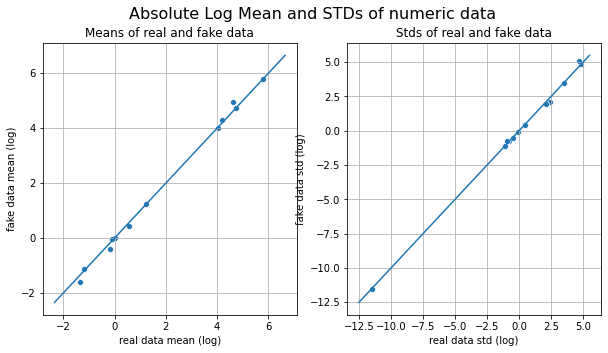

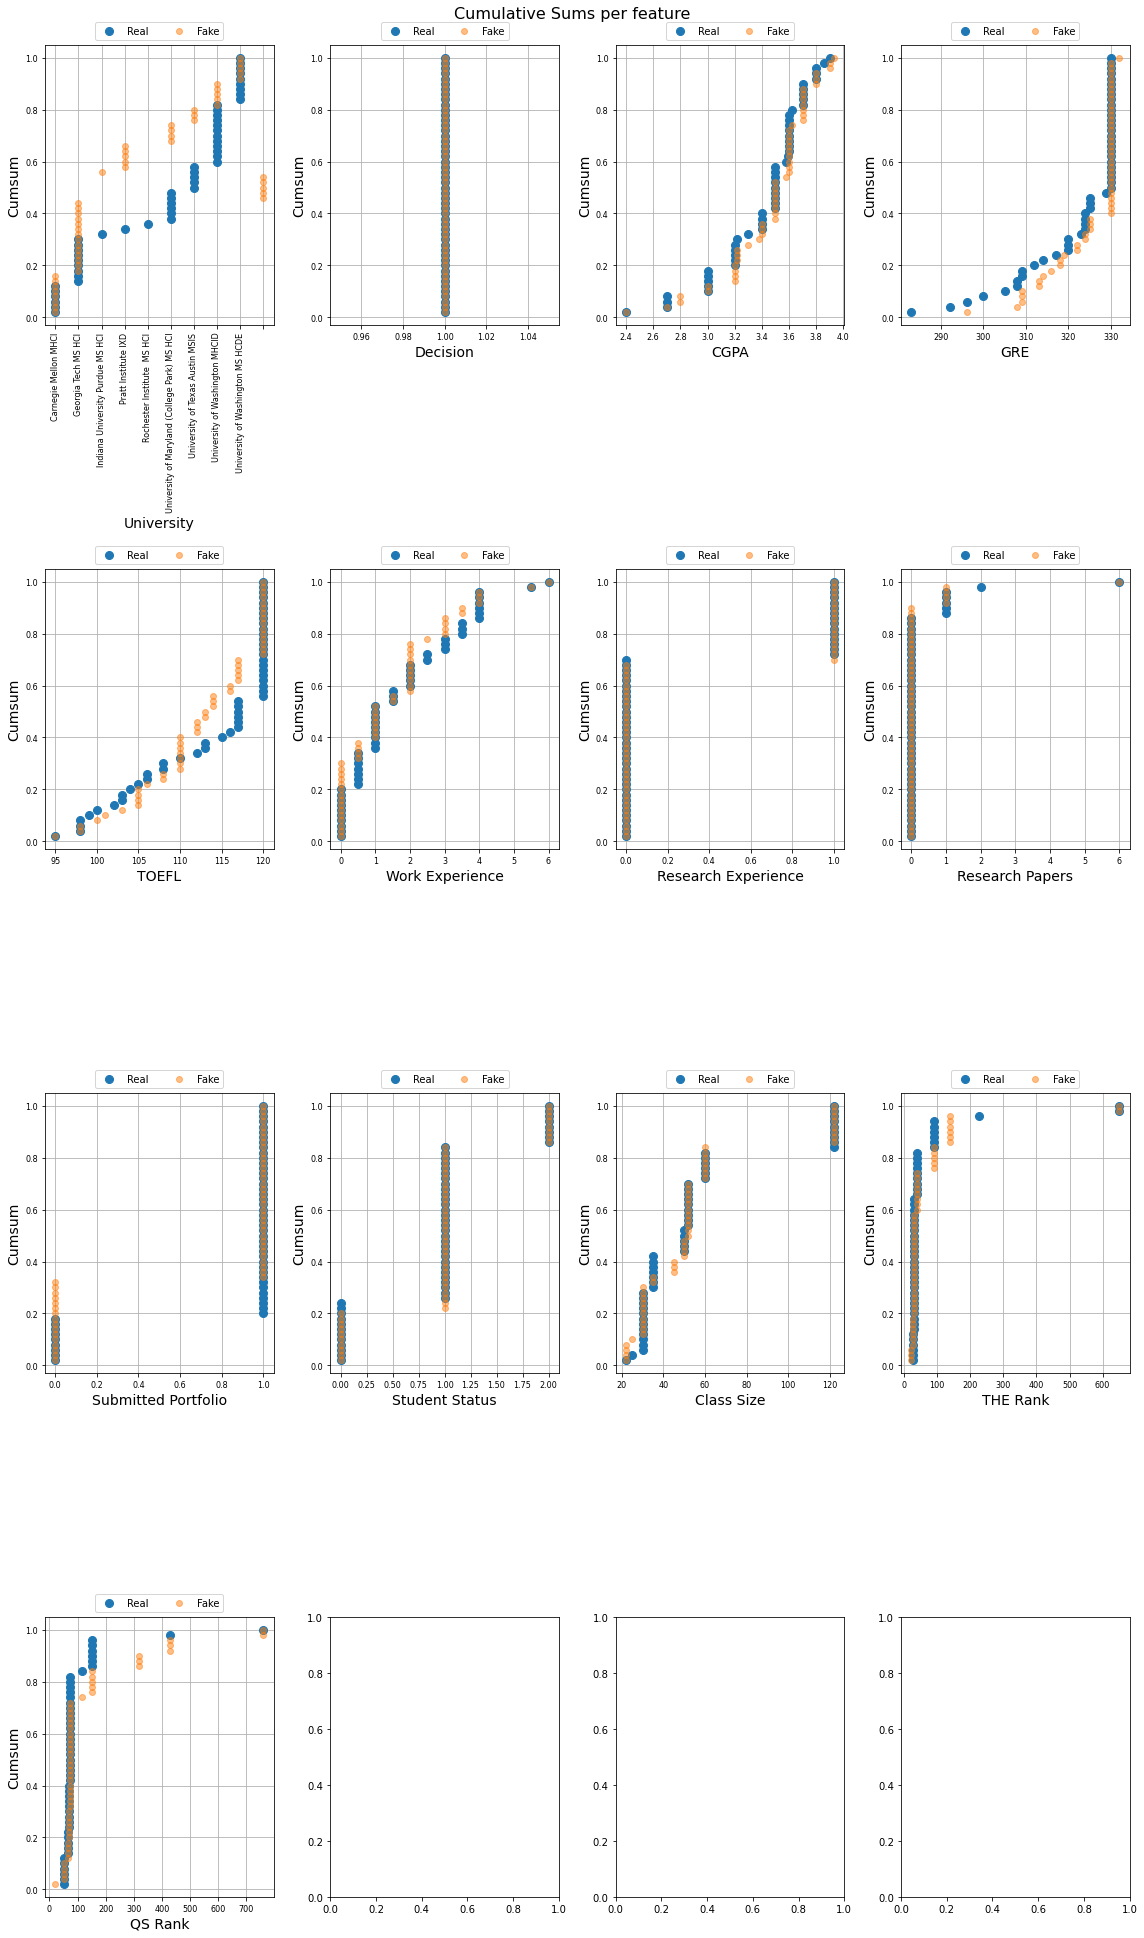

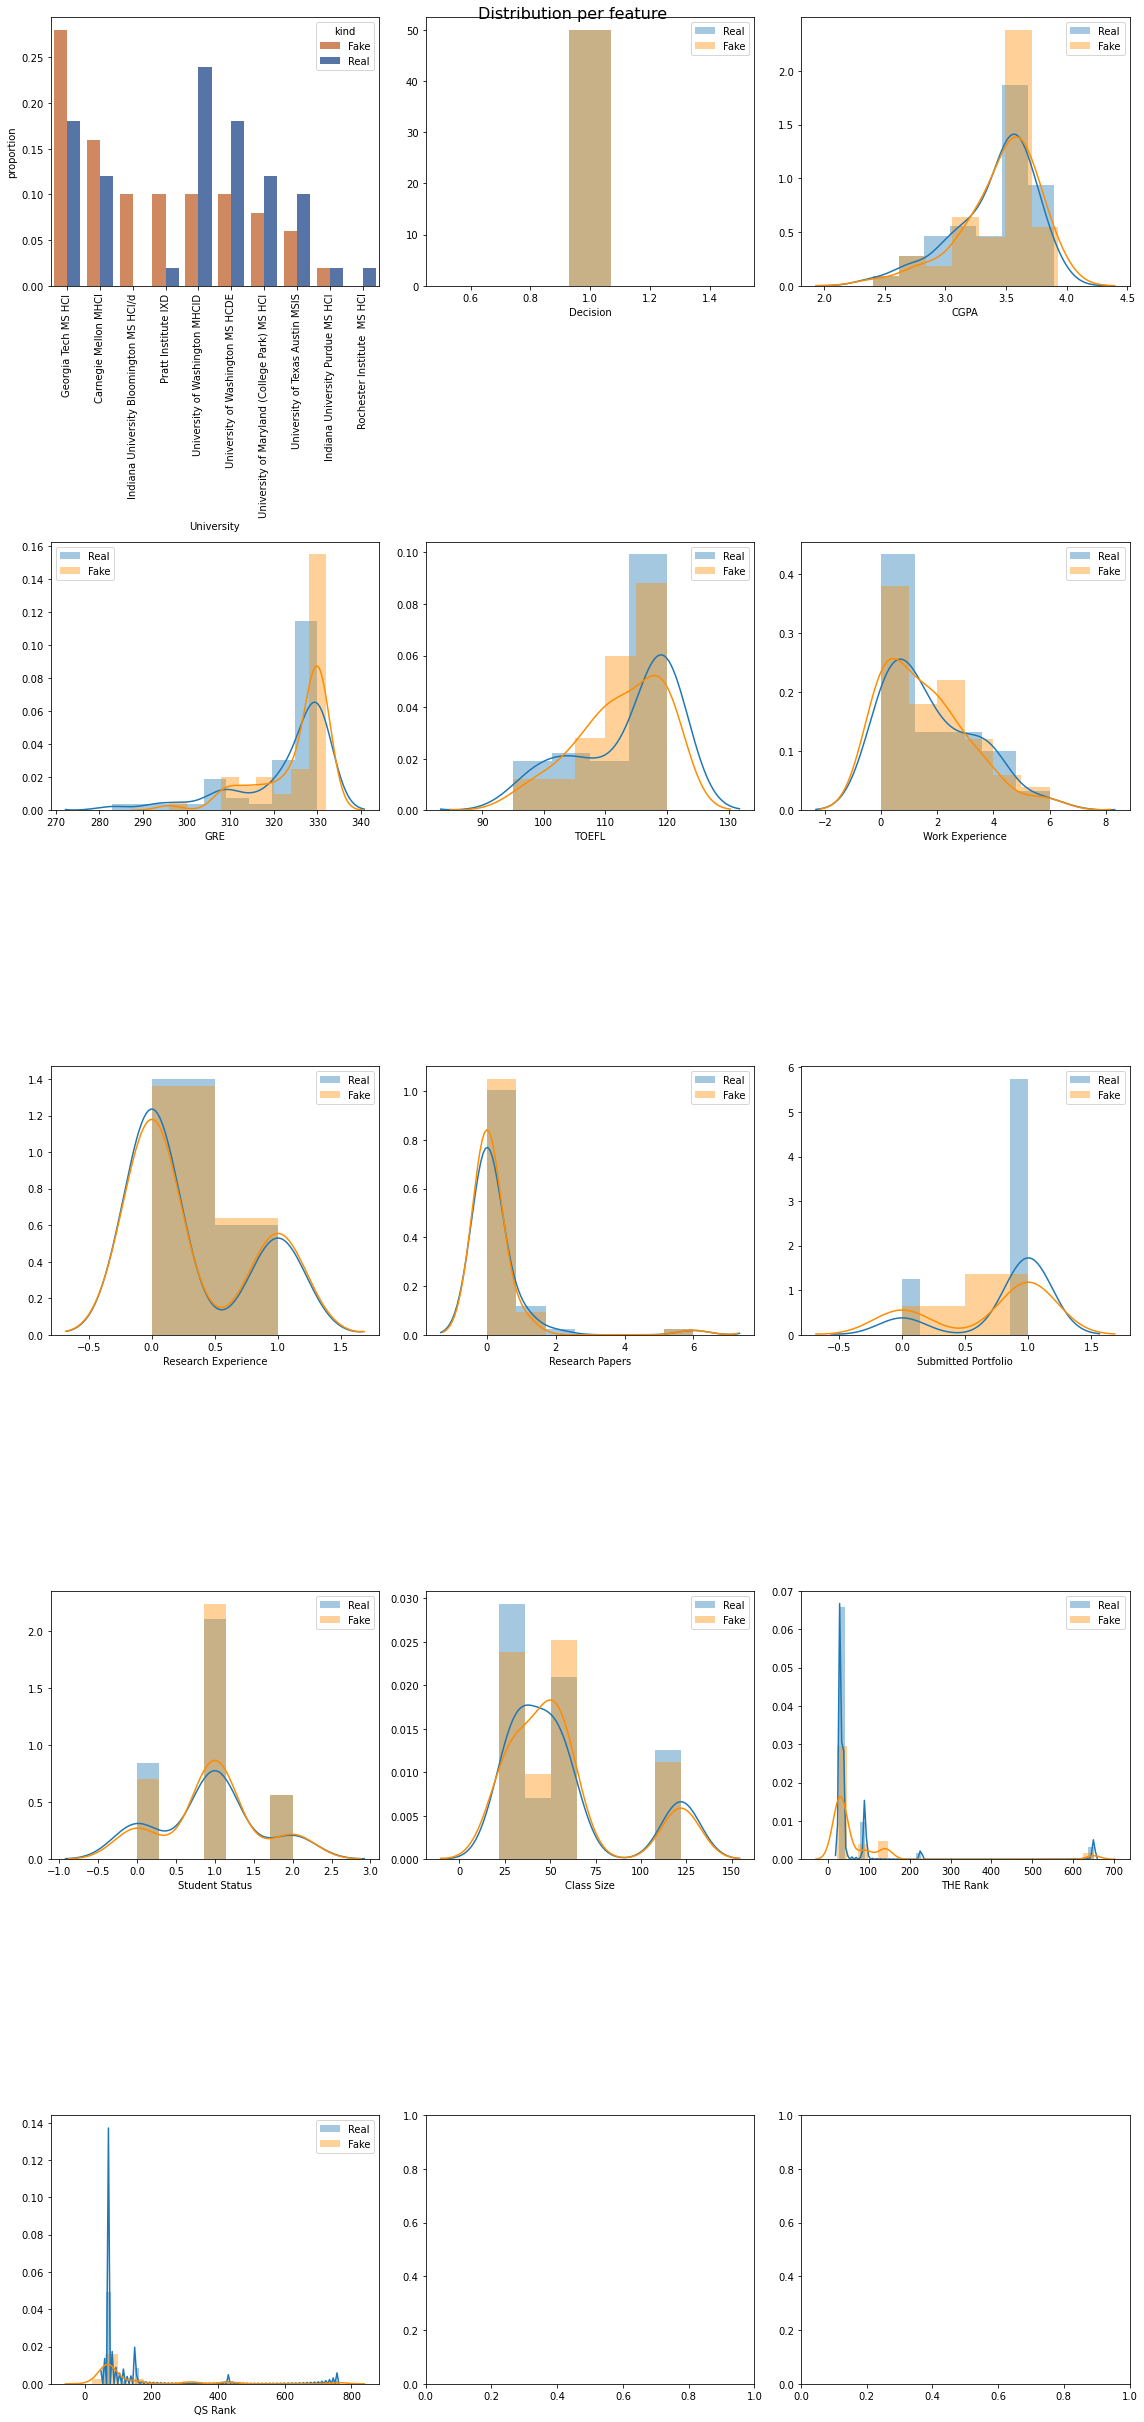

In [12]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(rejects_data, ctgan)
try:
    table_evaluator.visual_evaluation()
except:
    print()

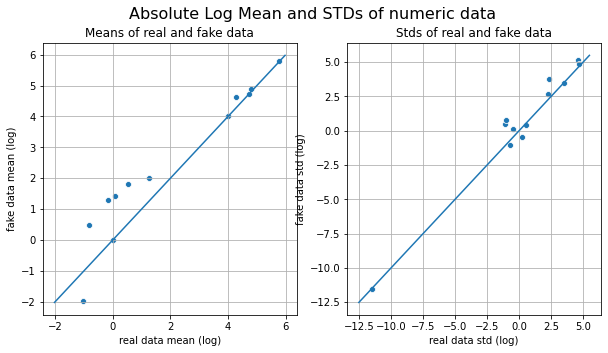

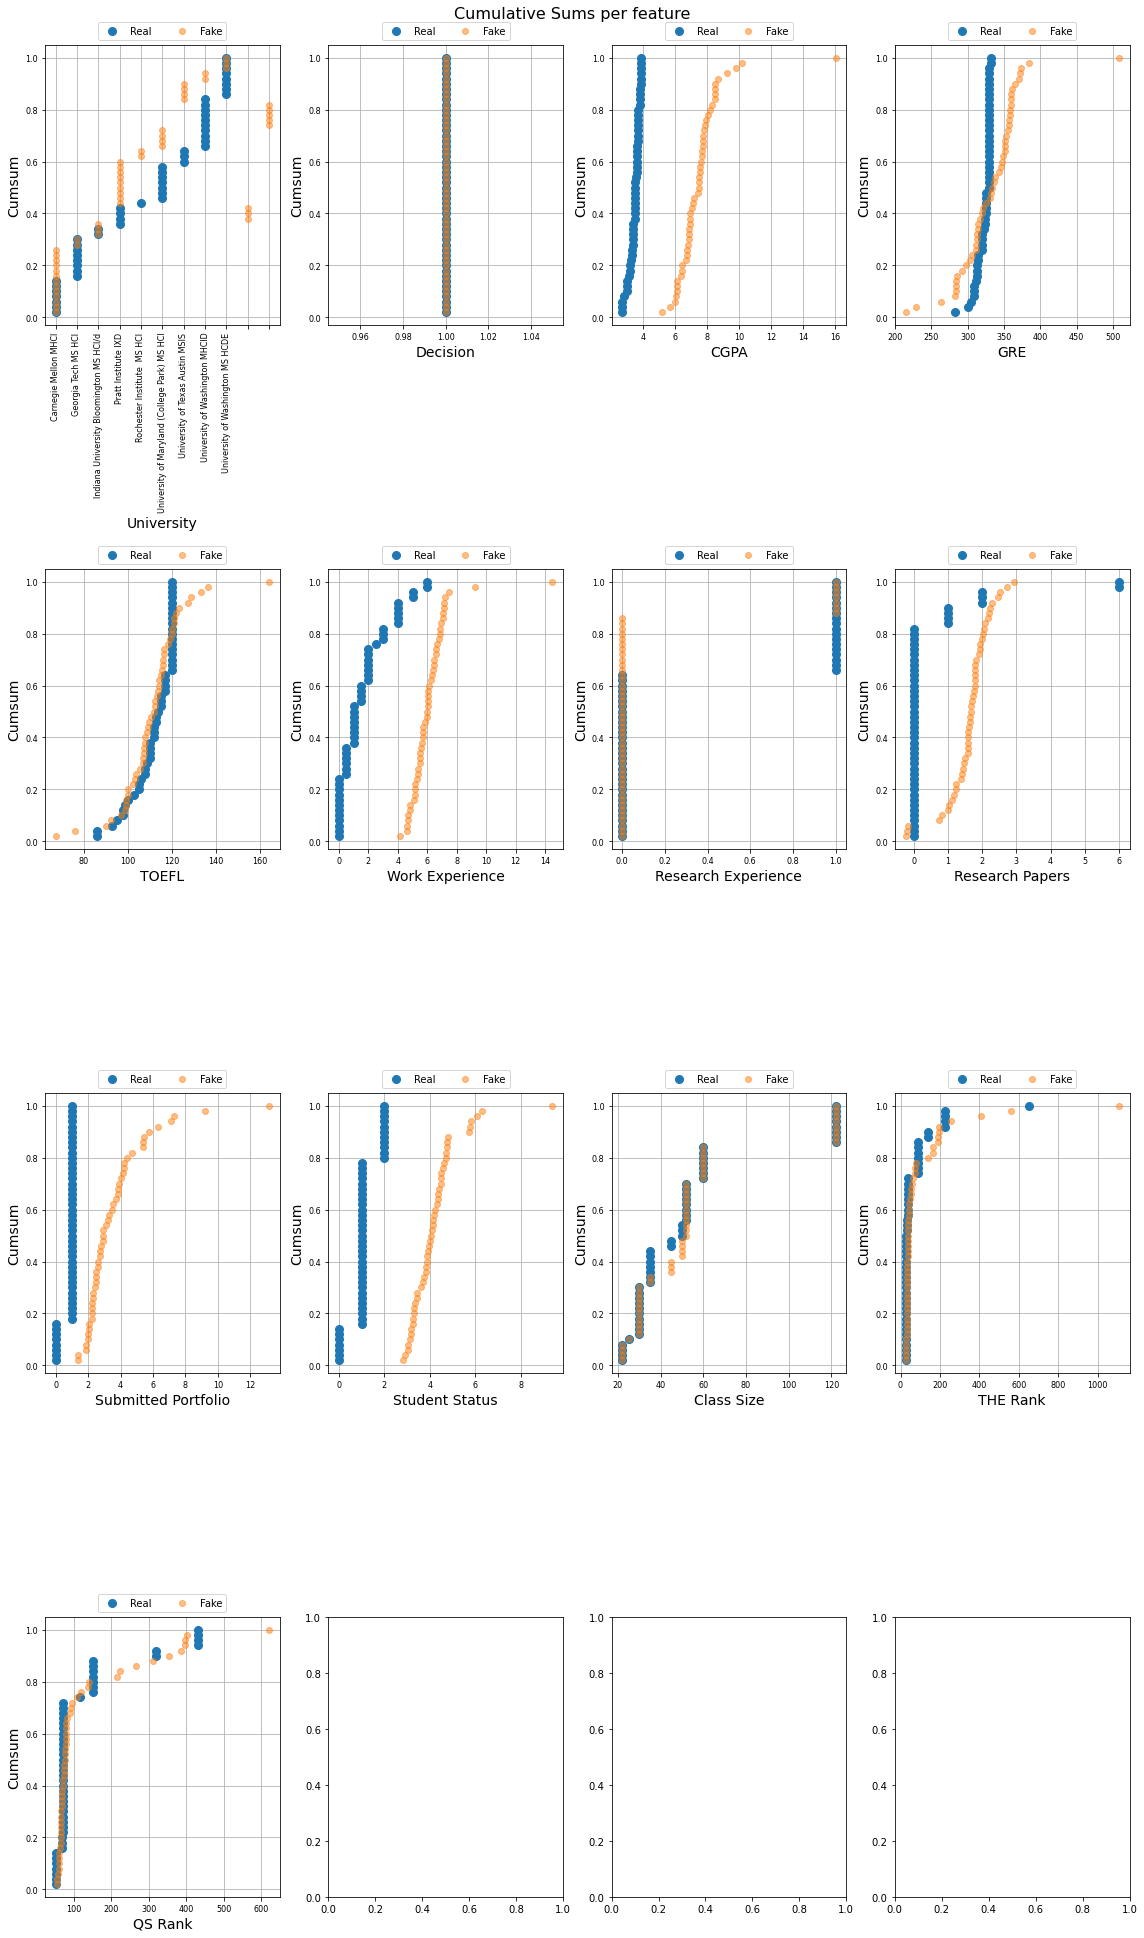

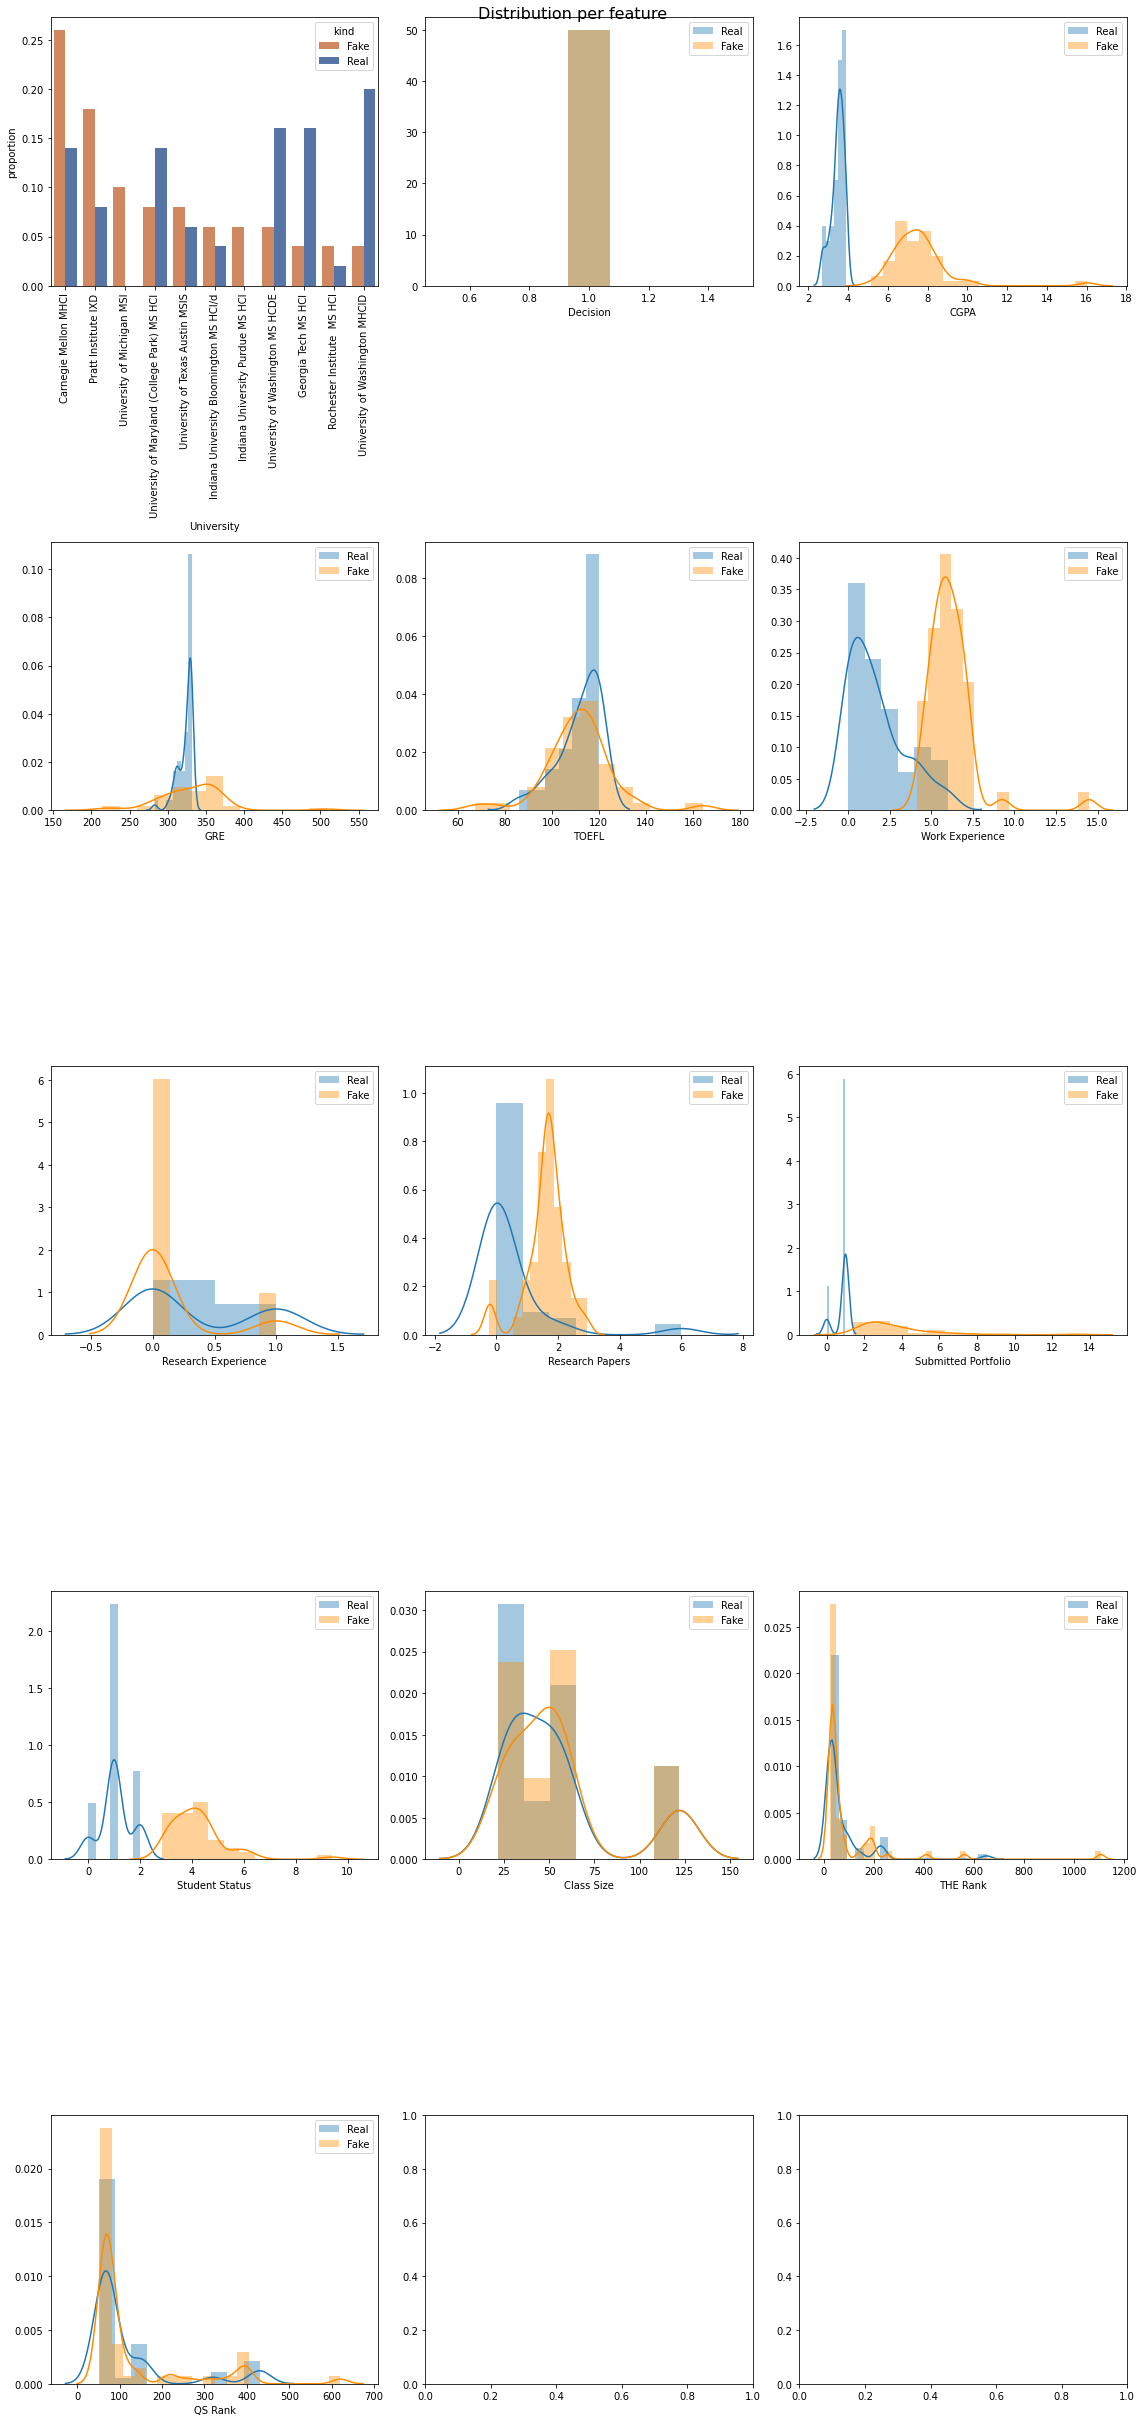

In [13]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(rejects_data, wgan)
try:
    table_evaluator.visual_evaluation()
except:
    print()

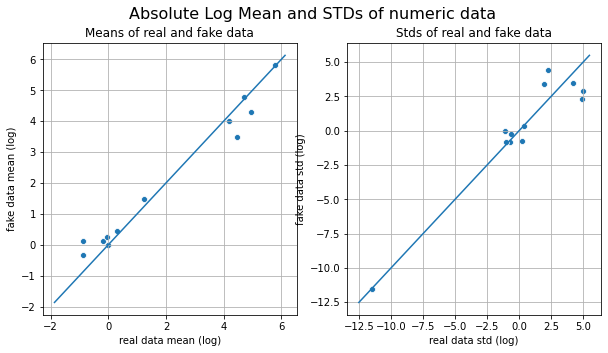

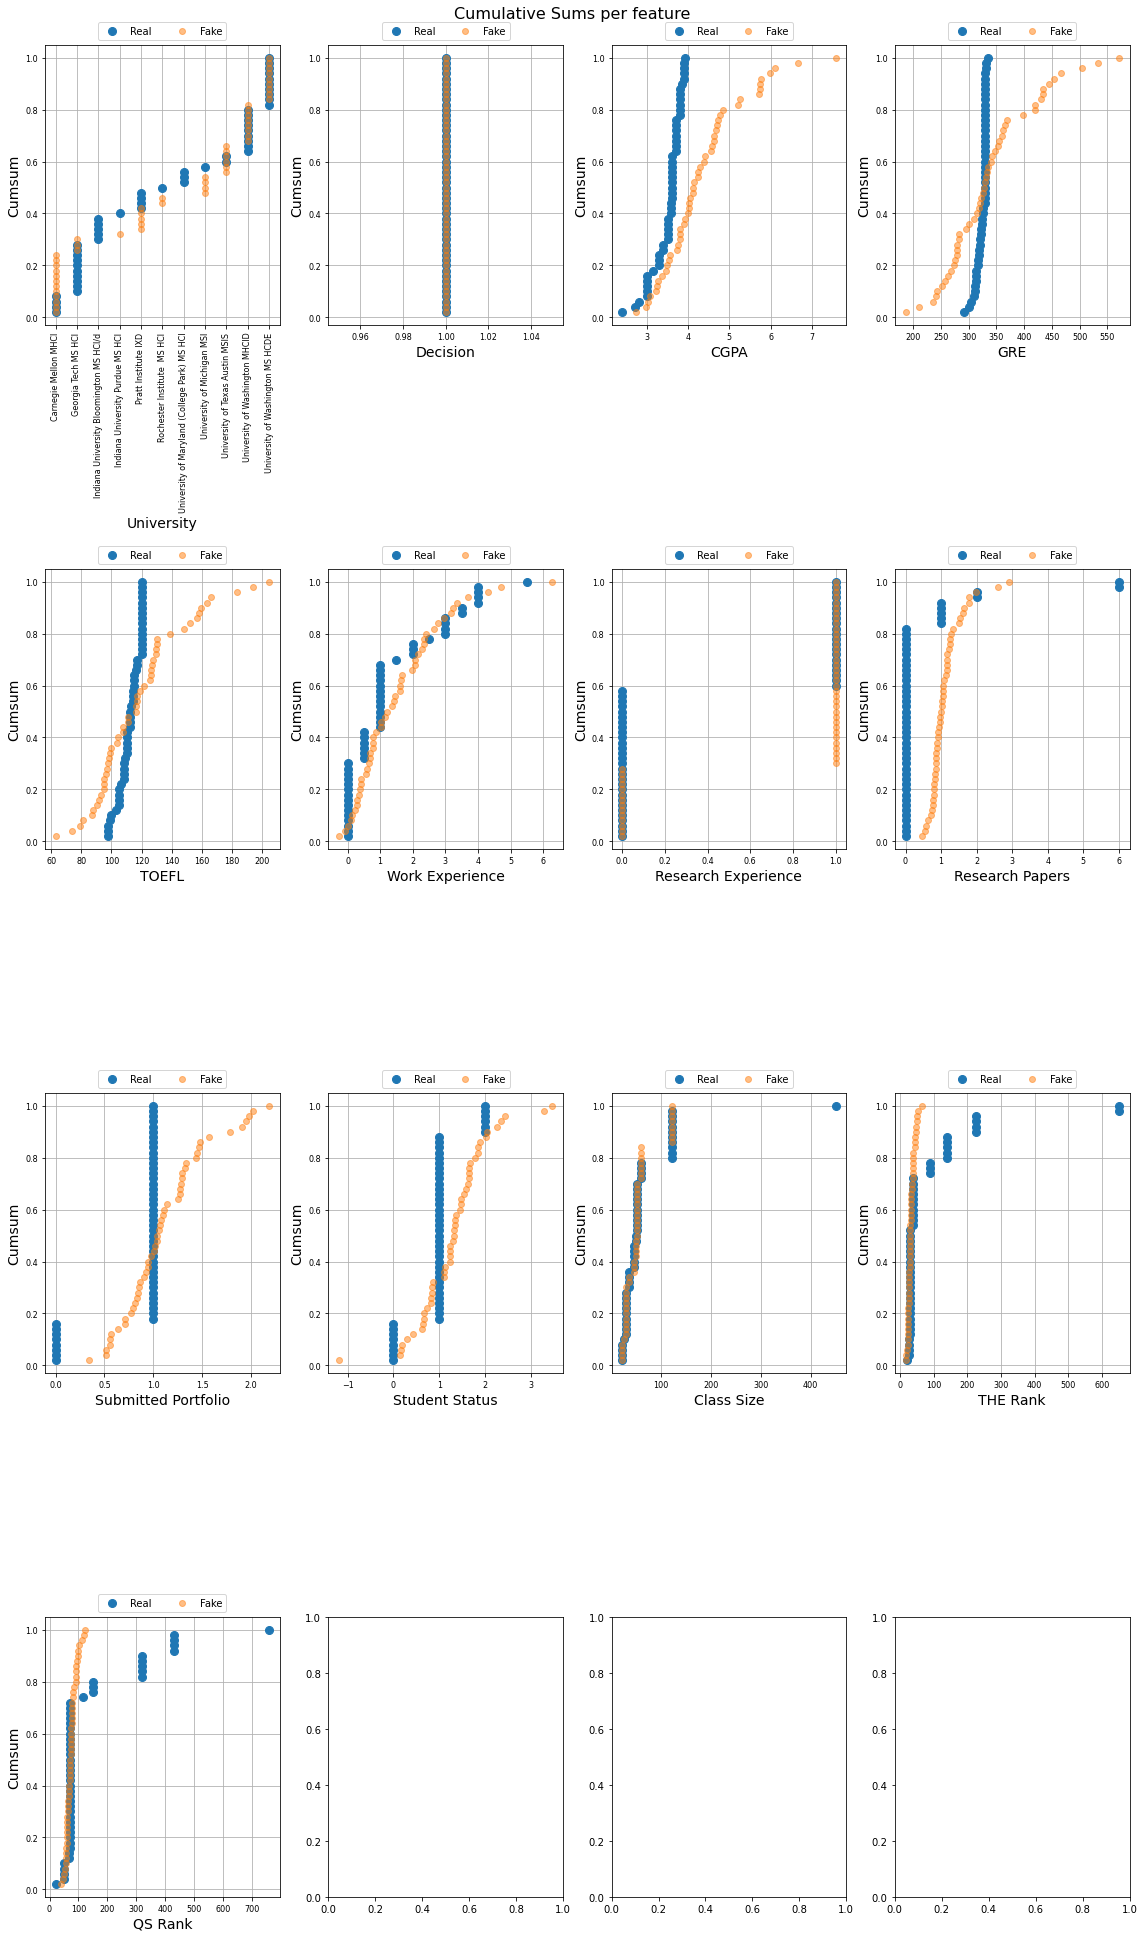

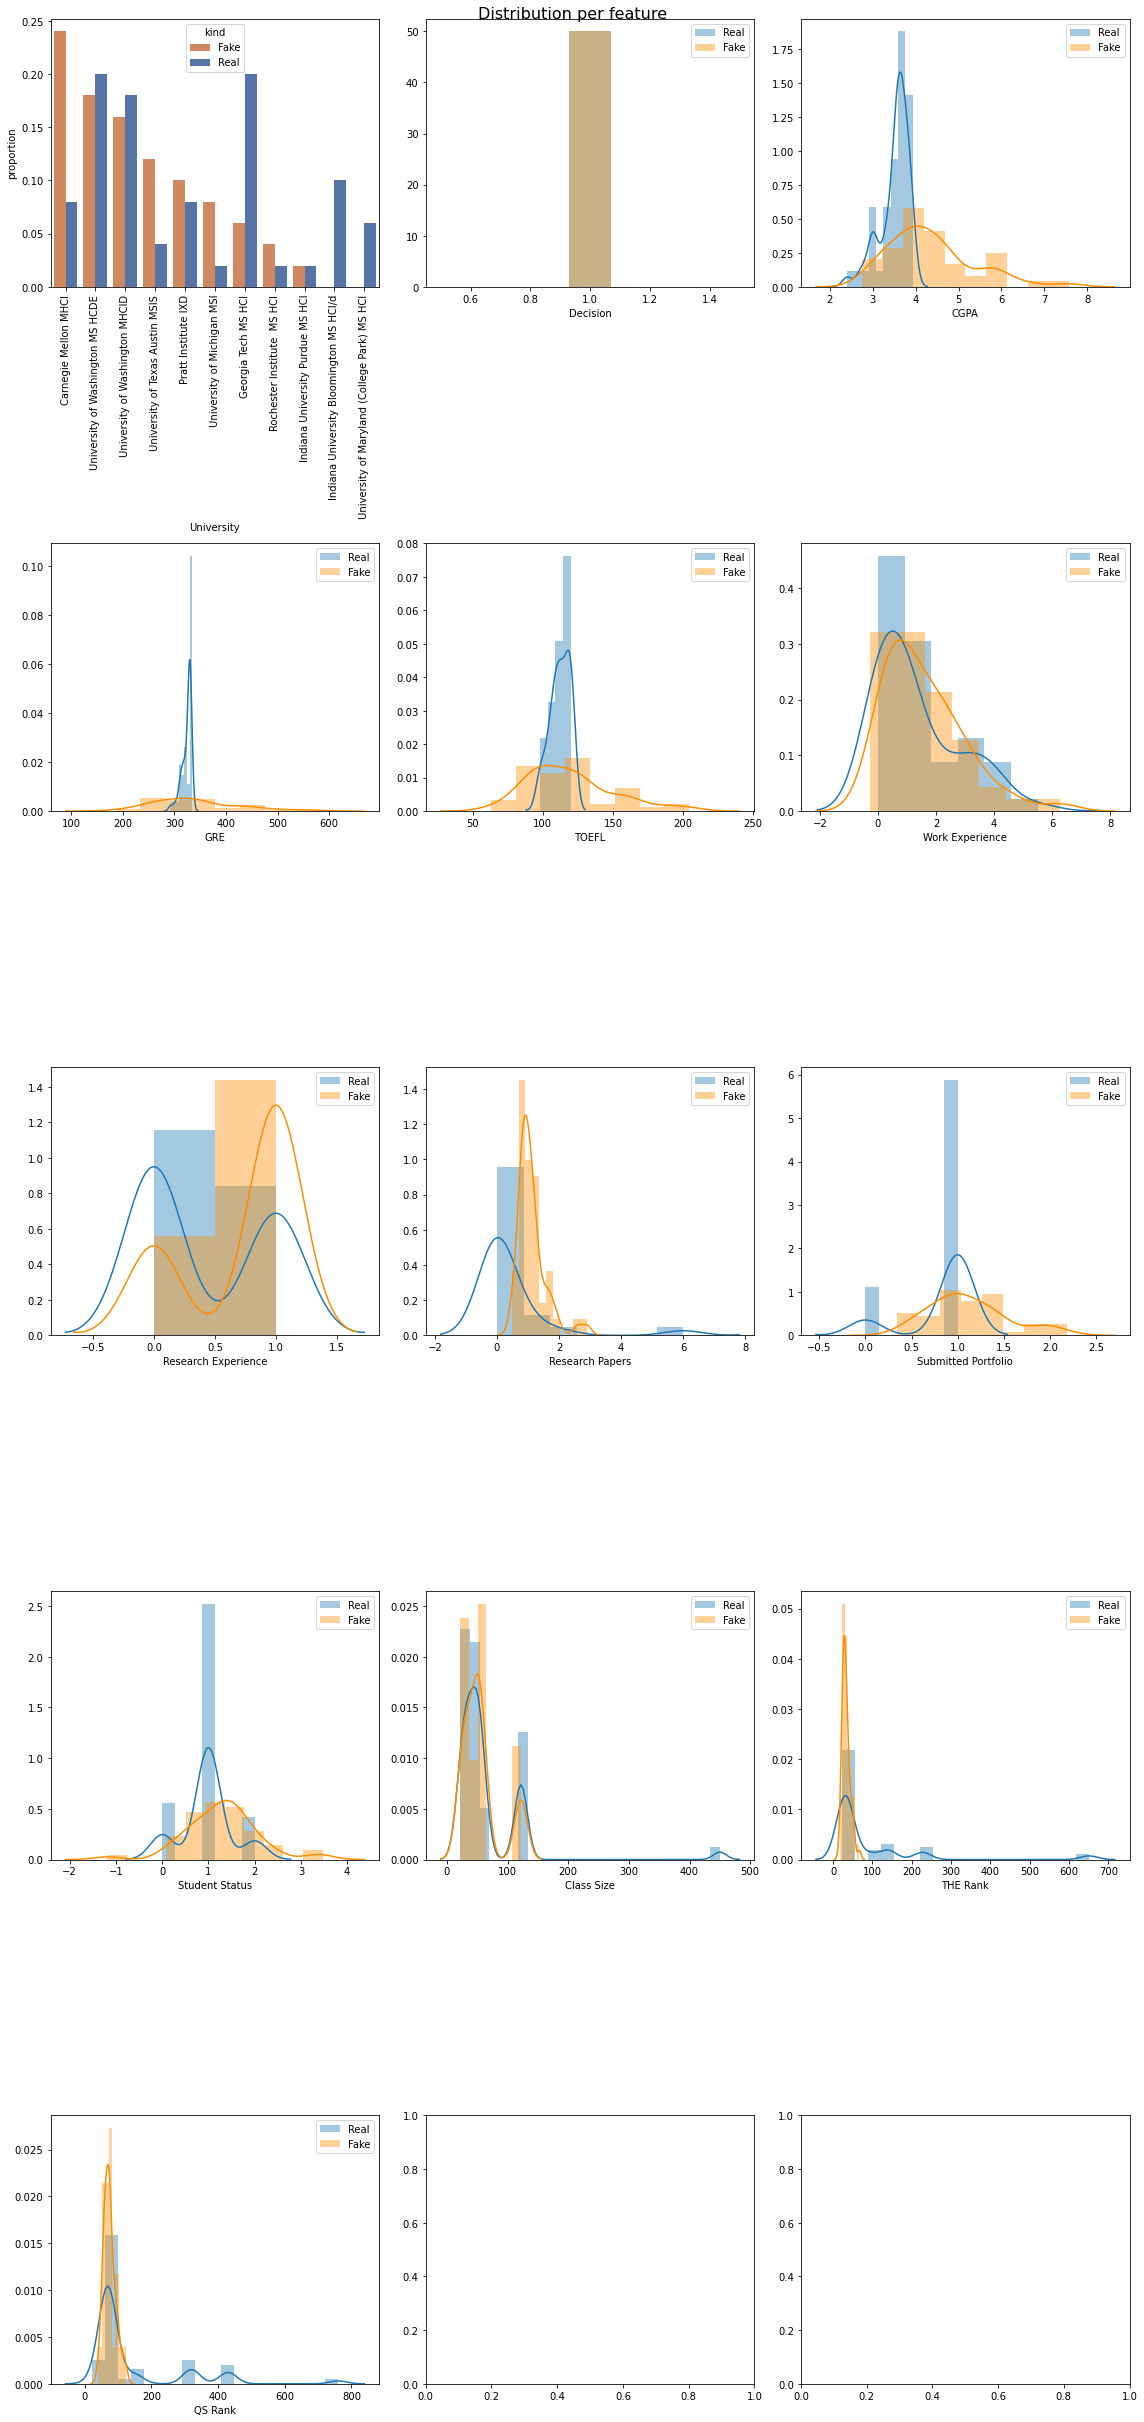

In [14]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(rejects_data, vanilla)
try:
    table_evaluator.visual_evaluation()
except:
    print()